# <center>Part I - Exploratory Analysis of Adult Income Dataset</center>
### <center>by</center>

## <center>Chukwudi Collins Ozoede</center>

## Introduction
> The US Adult income dataset is a repository of 48,842 entries extracted from the 1994 US Census database. 
It contains 15 columns before cleaning. Below are the columns and their meaning:

### The Dataset
- **age:** the age of an individual
- **workclass:** a general term to represent the employment status of an individual
- **fnlwgt:** final weight. In other words, this is the number of people the census believesthe entry represents..
- **education:** the highest level of education achieved by an individual.
- **education-num:** the highest level of education achieved in numerical form.
- **marital-status:** marital status of an individual.
- **occupation:** the general type of occupation of an individual
- **relationship:** represents what this individual is relative to others. 
- **race:** Descriptions of an individual’s race
- **sex:** the biological sex of the individual
- **capital-gain:** capital gains for an individual
- **capital-loss:** capital loss for an individual
- **hours-per-week**: the hours an individual has reported to work per week
- **native-country:** country of origin for an individual
- **Salary:** whether or not an individual makes more than $50,000 annually.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.

In [2]:
adult_df = pd.read_csv('adult.data.csv')
adult_df.sample(50)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
22110,46,Local-gov,297759,Some-college,10,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,<=50K
26530,38,Self-emp-not-inc,65716,Assoc-voc,11,Divorced,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
15145,34,Private,318886,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,Black,Male,0,0,40,United-States,<=50K
26226,35,Private,509462,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,45,United-States,<=50K
21102,35,Private,169672,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
16891,36,Private,33355,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,45,United-States,<=50K
16071,57,State-gov,250976,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
6469,53,State-gov,116367,Some-college,10,Divorced,Adm-clerical,Other-relative,White,Female,4650,0,40,United-States,<=50K
4002,28,Private,157391,Bachelors,13,Never-married,Sales,Own-child,White,Female,0,0,40,United-States,<=50K
26549,67,?,174995,Some-college,10,Married-civ-spouse,?,Husband,White,Male,0,2457,40,United-States,<=50K


In [3]:
# this is an overview of the data shape and composition
print(adult_df.shape)
print(adult_df.dtypes)
print(adult_df.info())

(32561, 15)
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   s

In [4]:
# making a copy of the dataframe before cleaning and analysis
df = adult_df.copy()

### Data cleaning
- Unnecessary columns have to be removed from the dataset
- I discovered that some cells have '?' as their values, they should all be changed to NAN
- I need to create a new column `age_group` to store age groups

#### Issue 1:
Removing unnecessary columns from the dataframe

In [5]:
# subseting for the columns needed for this ananlysis
df = df[['age','workclass','education','marital-status', 'occupation', 'relationship', 
         'race', 'sex', 'hours-per-week', 'native-country','salary']]
df.head(1)

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K


#### Issue 2: 
changing '?' values to NAN 

In [6]:
#solution:
df = df.replace('?', np.nan)
df.head(5)

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


#### Issue 3:
Create new column `age_group` 

In [7]:
#create an age group to avoid noisy and clustered visuals 
ages = df.age
age_group = []
for i, age in ages.items():
    
    if age <= 20:
        age_group.append('17-20')
    elif age>20 and age<31:
        age_group.append('21-30')
    elif age>30 and age<41:
        age_group.append('31-40')
    elif age>40 and age<51:
        age_group.append('41-50')
    elif age>50 and age<61:
        age_group.append('51-60')
    elif age>60 and age<71:
        age_group.append('61-70')
    elif age>70 and age<81:
        age_group.append('71-80')
    else:
        age_group.append('above 80')
df['age_group']= age_group


# this method can also be used
"""
conditions = [
    (df['age']<=20),
    (df['age']>20) & (df['age']<31),
    (df['age']>30) & (df['age']<41),
    (df['age']>40) & (df['age']<51),
    (df['age']>50) & (df['age']<61),
    (df['age']>60) & (df['age']<71),
    (df['age']>70) & (df['age']<81),
    (df['age']>80),
    ]

# create a list of the values we want to assign for each condition
values = ['17-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', 'above 80']

# create a new column and use np.select to assign values to it using our lists as arguments
df['age_group'] = np.select(conditions, values)



# display updated DataFrame
df.head()
"""

"\nconditions = [\n    (df['age']<=20),\n    (df['age']>20) & (df['age']<31),\n    (df['age']>30) & (df['age']<41),\n    (df['age']>40) & (df['age']<51),\n    (df['age']>50) & (df['age']<61),\n    (df['age']>60) & (df['age']<71),\n    (df['age']>70) & (df['age']<81),\n    (df['age']>80),\n    ]\n\n# create a list of the values we want to assign for each condition\nvalues = ['17-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', 'above 80']\n\n# create a new column and use np.select to assign values to it using our lists as arguments\ndf['age_group'] = np.select(conditions, values)\n\n\n\n# display updated DataFrame\ndf.head()\n"

### What is the structure of your dataset?

> My dataset contains 32561 rows and 16 columns, It contains no null values 

### What is/are the main feature(s) of interest in your dataset?

> The main porpose of this analysis is to find the distribution of salary in the US and how it is affected by different factors such as age, race, education etc.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>What my investigation is looking for is how different factors (columns) such as education, marital-status, native country make people make less than 50k usd or more 

## Univariate Exploration

> In this section, I will investigate distributions of individual variables. If
I see unusual points or outliers, I will take a deeper look to clean things up
and prepare myself to look at relationships between variables.

### Question 1:
what percentage of people earn above and below 50k usd

### visualization : 

In [9]:
# getting the distribution by salary group
sal_dist= df['salary'].value_counts().reset_index()
(list(sal_dist['index']))

['<=50K', '>50K']

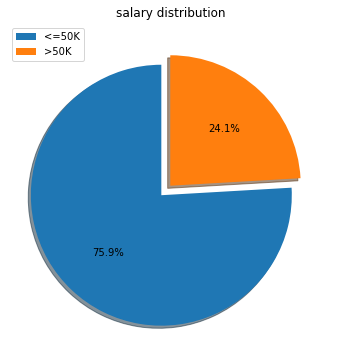

In [10]:
#plotting a pie since we only have 2 variables

#creating a function for the pie
def pie_1(data, title, explode,legend, fig_x =6, fig_y=6, shadow = False, startangle =90,autopct ='%1.1f%%'):
    plt.figure(figsize=[fig_x, fig_y])
    
    plt.pie(data, explode = explode, autopct=autopct ,shadow=shadow, startangle=startangle)
    plt.title(title)
    plt.legend(legend)
    
#calling the function    
pie_1(list(sal_dist['salary']),title = 'salary distribution' ,fig_x =6, fig_y=6, 
      explode =[0.1,0], shadow = True, legend = (list(sal_dist['index'])));

### observations:
I can observe that about 76% of the people earn 50k and below while 24% earn above 50k

### Question 2: 
Which race do these people belong to

### Visualization:

In [11]:
# grouping by race
top_10 = df['race'].value_counts()
top_10

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

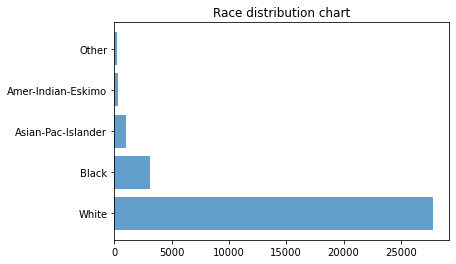

In [12]:
#plotting a horizontal barchart
plt.barh(top_10.index, top_10.values, alpha=0.7)
plt.title('Race distribution chart');

### obsevation:
White people are by far more represented in the dataset, a distant second is black people


### Question 3: 
For how long do people work in a week?

### Visualization:

In [ ]:
hours = df['hours-per-week'].value_counts()
hours.head(4)

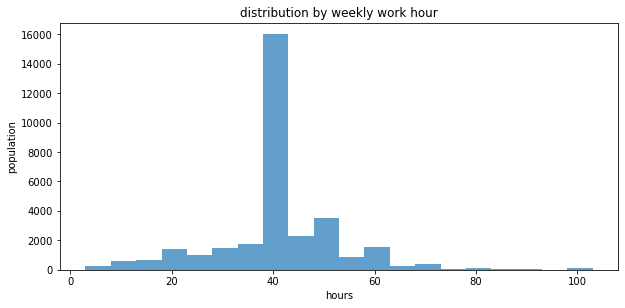

In [13]:
def hist_1(df_i, col, x_label, y_label, title, sub_x=1, sub_y=2, sub_z=1, fig_x =6, fig_y=15, alpha = 0, start_bins = 0.0):
    plt.figure(figsize=[fig_x, fig_y])
    plt.subplot(sub_x, sub_y, sub_z)
    
    bins = np.arange(start_bins, df[col].max()+5.5, 5)
    plt.hist(data = df_i, x = col, bins=bins, alpha = alpha)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
hist_1(df_i=df, col='hours-per-week', x_label = 'hours', y_label = 'population', title = 'distribution by weekly work hour', 
       alpha = 0.7, start_bins = 03.0,fig_x=10, fig_y=10,sub_x=2, sub_y=1, sub_z=1)

### obsevation:
Most people work the standard 40hrs per week (15,000 people), about 3000 people work 50 hrs every week

### Question 4 :
What is the distribution of education level

### Visualization:

In [14]:
edu = df['education'].value_counts()
edu

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

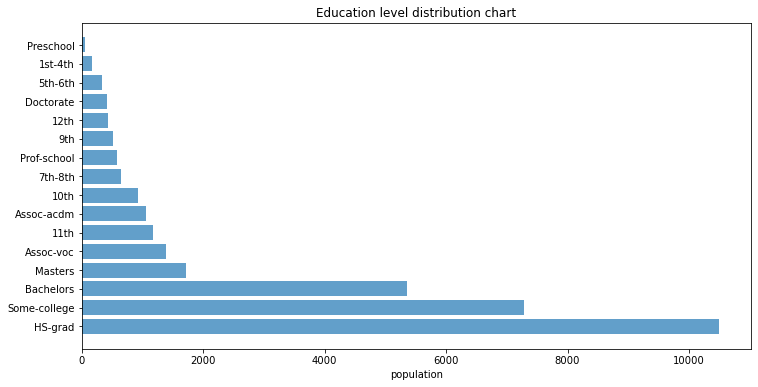

In [15]:
#plotting a horizontal barchart
plt.figure(figsize = [12,6])
plt.barh(edu.index, edu.values, alpha=0.7)
plt.title('Education level distribution chart')
plt.xlabel('population');

### obsevation:
majority of them have either a some-college, high school or bachelors degree certificates, very few have preschool

### Question 5: 
What is the age distribution amongst the people?

### Visualization:

In [16]:
ages = df['age'].value_counts()
ages.head(2)

36    898
31    888
Name: age, dtype: int64

In [17]:
ages1 = df.age_group.value_counts().sort_values(ascending =False)
ages1

31-40       8546
21-30       8162
41-50       6983
51-60       4128
17-20       2410
61-70       1792
71-80        441
above 80      99
Name: age_group, dtype: int64

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


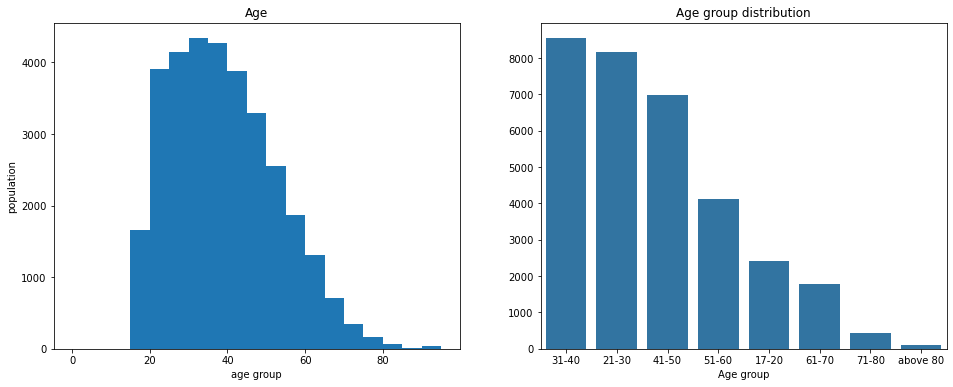

In [19]:
hist_1(df_i=df, col='age', x_label = 'age group', y_label = 'population', title = 'Age', 
       alpha = 1,fig_x=16, fig_y=6, sub_x=1, sub_y=2, sub_z=1)

plt.subplot(1,2,2)
base_color = sb.color_palette()[0]
sb.barplot( ages1.index, ages1.values, color= base_color)
plt.xlabel('Age group')
plt.title('Age group distribution');

### obsevation:
The  age distribution is right skewed and the most frequent age group falls between 21 and 50 years

### Question 6:
What is the population distribution by country of origin

### Visualization:

In [20]:
country = df['native-country'].value_counts()
country

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

In [21]:
US = country.values[0]
others= country.values[1:].sum()


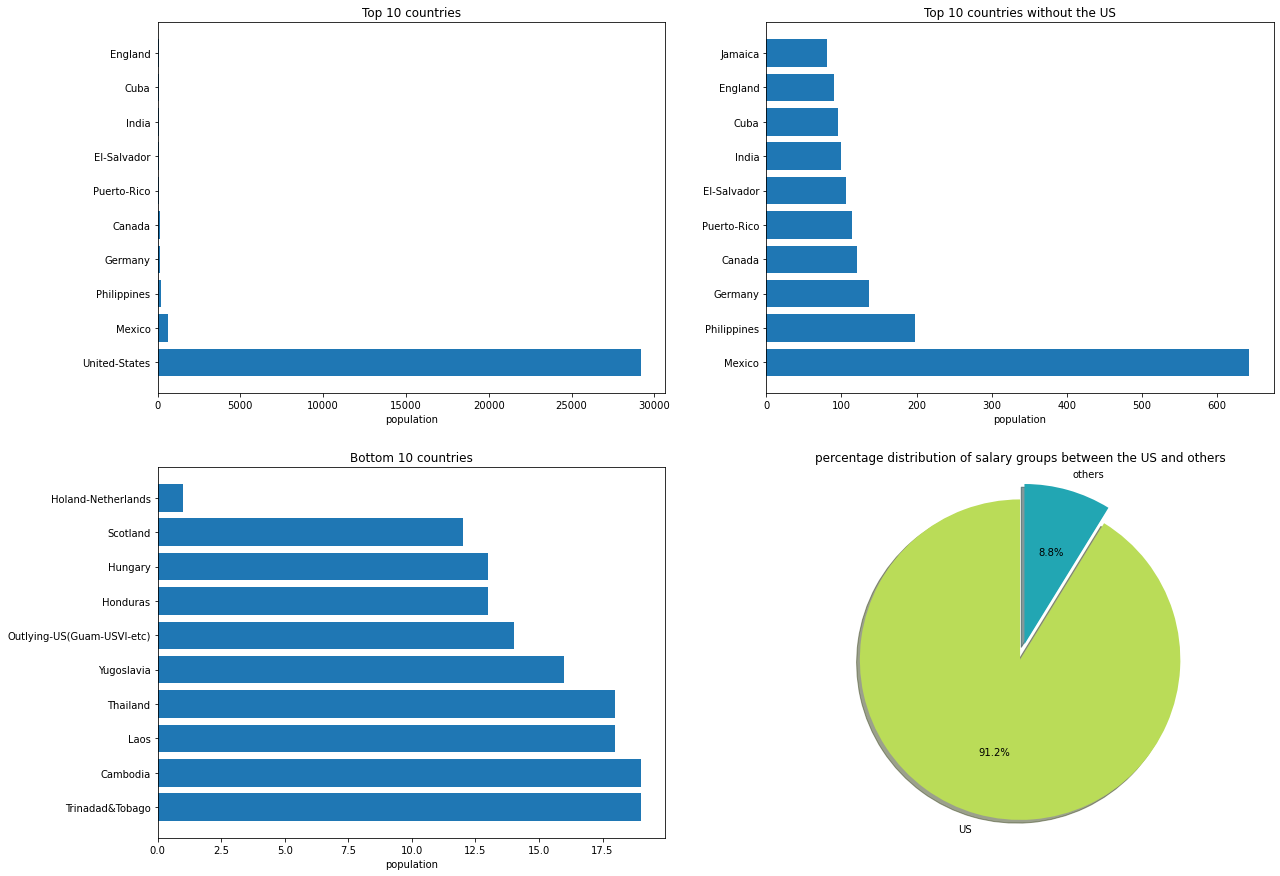

In [22]:
#define size of figure
plt.figure(figsize=[20,15])

#subplots
plt.subplot(2,2,1)
plt.barh(country.index[:10],country.values[:10])
plt.title('Top 10 countries')
plt.xlabel('population')

plt.subplot(2,2,2)
plt.barh(country.index[1:11],country.values[1:11])
plt.title('Top 10 countries without the US')
plt.xlabel('population');

plt.subplot(2,2,3)
plt.barh(country.index[-10:],country.values[-10:])
plt.title('Bottom 10 countries')
plt.xlabel('population');

plt.subplot(2,2,4)
explode = [0.1, 0]
label = ['US','others']
#fig = plt.figure(figsize =(6, 6))
plt.pie([US,others], labels = label, explode = explode, autopct='%1.1f%%',shadow=True, startangle=90, colors = ( "#BADC58", "#22A6B3")) 
plt.title('percentage distribution of salary groups between the US and others' )
plt.axis('equal');

### obsevation:

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

I am mostly interested in the `salary` distribution, We can observe that about 76% of the people earn 50k and below while only 24% earn above 50k. We shall analyze further to unravel the factors that affect `salary` 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

No, the distribution is normal and there are no outliers